# Libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sb

# Import

In [4]:
df = pd.read_csv(r"Datasets/WineQualityDuplicate.csv")

# Feature Seperation

In [5]:
X = df.drop(columns=['quality', 'type'])
y = df['quality']

# Train Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CatBoost Regressor Initialization

In [7]:
model = CatBoostRegressor(
    iterations=476,
    learning_rate=0.1,
    depth=16,
    loss_function='RMSE',
    verbose=100
)

# Training

In [8]:
model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True, plot=False)

0:	learn: 0.7919836	test: 0.8237923	best: 0.8237923 (0)	total: 593ms	remaining: 4m 41s
100:	learn: 0.1287027	test: 0.6247207	best: 0.6245842 (96)	total: 1m 5s	remaining: 4m 4s
200:	learn: 0.0448611	test: 0.6215024	best: 0.6213818 (185)	total: 2m 8s	remaining: 2m 55s
300:	learn: 0.0180584	test: 0.6208833	best: 0.6208113 (288)	total: 3m 8s	remaining: 1m 49s
400:	learn: 0.0078657	test: 0.6208411	best: 0.6208113 (288)	total: 4m 10s	remaining: 46.8s
475:	learn: 0.0043105	test: 0.6207734	best: 0.6207734 (475)	total: 4m 54s	remaining: 0us

bestTest = 0.6207733698
bestIteration = 475



# Prediction

In [9]:
y_pred = model.predict(X_test)

# Accuracy

In [10]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [11]:
print("Test MSE:", mse)
print("Test R^2:", r2)

Test MSE: 0.3853595767104061
Test R^2: 0.4515712724076877


# Vizualization

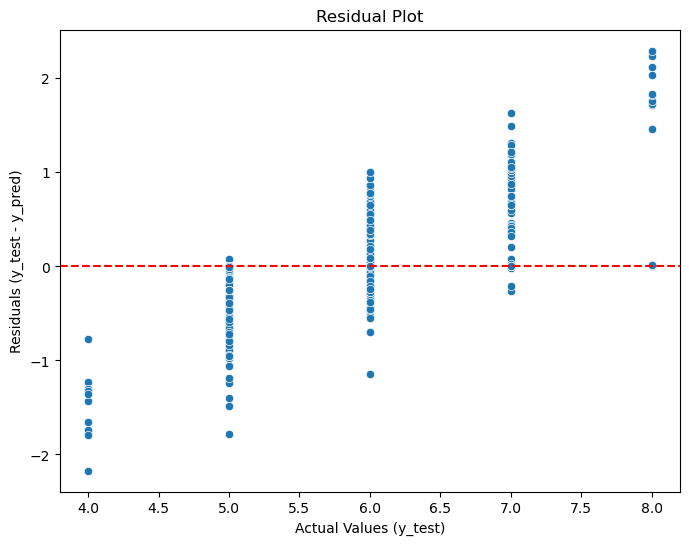

In [12]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sb.scatterplot(x=y_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Residuals (y_test - y_pred)")
plt.show()


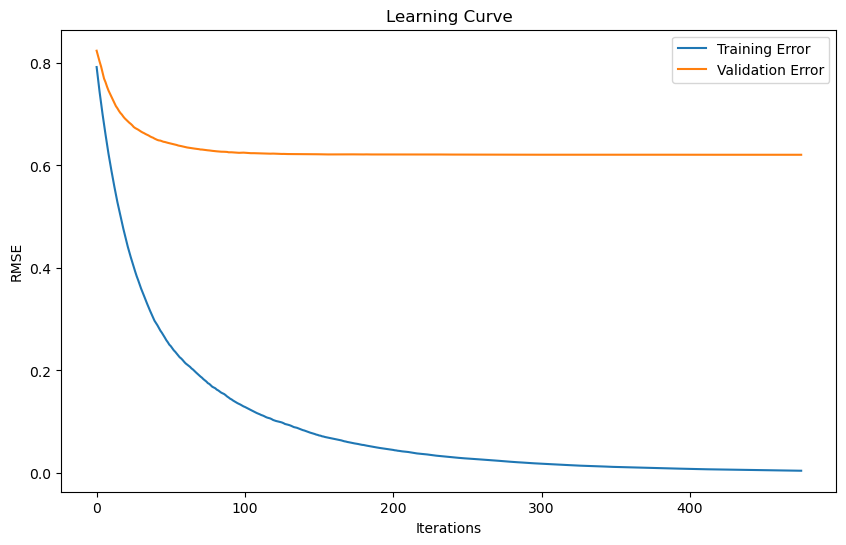

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(model.evals_result_['learn']['RMSE'], label="Training Error")
plt.plot(model.evals_result_['validation']['RMSE'], label="Validation Error")
plt.title("Learning Curve")
plt.xlabel("Iterations")
plt.ylabel("RMSE")
plt.legend()
plt.show()